# Тема “Тематическое моделирование”

Задание 1. Взять ноутбук с вебинара изменить тематики (минимум 3-ри тематики взять) построить тематическую модель, попробовать проинтерпретировать полученные тематики. Насколько они похожи на то что вы выделяли из корпуса. Возможно большее количество тематик так же хорошо интерпретируется проверьте это. Подберите оптимальное количество тематик с точки зрения интерпретации результатов. Не забывайте чтобы получить хорошие тематики надо хорошо почистить тексты.

### Тематическое моделирование 



In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from corus import load_lenta

path = 'lenta-ru-news.csv.gz'
records = load_lenta(path)
next(records)

LentaRecord(
    url='https://lenta.ru/news/2018/12/14/cancer/',
    title='Названы регионы России с\xa0самой высокой смертностью от\xa0рака',
    text='Вице-премьер по социальным вопросам Татьяна Голикова рассказала, в каких регионах России зафиксирована наиболее высокая смертность от рака, сообщает РИА Новости. По словам Голиковой, чаще всего онкологические заболевания становились причиной смерти в Псковской, Тверской, Тульской и Орловской областях, а также в Севастополе. Вице-премьер напомнила, что главные факторы смертности в России — рак и болезни системы кровообращения. В начале года стало известно, что смертность от онкологических заболеваний среди россиян снизилась впервые за три года. По данным Росстата, в 2017 году от рака умерли 289 тысяч человек. Это на 3,5 процента меньше, чем годом ранее.',
    topic='Россия',
    tags='Общество',
    date=None
)

In [3]:
data = [(record.title, record.topic, record.text, record.tags) for record in records]

In [4]:
import pandas as pd
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [5]:
data = pd.DataFrame(data, columns=['title','topic','text','tags'])

In [6]:
data.sample(3)

,title,topic,text,tags
483606,"Первое телеинтервью президента Обамы посмотрели 24,5 миллиона зрителей",Мир,"Телевизионное интервью Барака Обамы в новом качестве избранного президента США посмотрели 24,5 миллиона телезрителей, сообщает агентство Reuters в понедельник со ссылкой на данные компании Nielsen Media Research. Показанное в эфире новостной программы телеканала CBS ""60 Minutes"" вечером 17 ноября интервью стало рекордным по количеству зрителей за последние девять лет. Последний раз собрать у экранов сравнимую по масштабам аудиторию ""60 Minutes"" удалось в 1999 году. Какова была тема того выпуска, не уточняется. Беседа Обамы с ведущим CBS Стивом Крофтом (Steve Kroft) стала первым телевизионным интервью, данным Обамой после его победы на президентских выборах. В выпуске ""60 Minutes"" также приняла участие супруга Обамы Мишель. Как отмечает агентство, накануне Обама также дал интервью журналу Ebony, одному из старейших в США изданий, основной аудиторией которого являются афроамериканцы. Этот материал будет опубликован в январском номере журнала.",Все
377336,Власти Гессена запретили приходить на госслужбу в парандже,Мир,"Министерство внутренних дел Гессена запретило госслужащим являться на работу в парандже, сообщает Welt. ""Должностные лица, особенно те, кто по роду своей деятельности общается с гражданами, не должны ходить закутанными"", - отмечается в обращении министерства. Поводом для подобного решения послужил скандал, связанной с одной из муниципальных служащих во Франкфурте-на-Майне. 39-летняя уроженка Марокко ходила на работу в хиджабе, однако после декретного отпуска, заявила, что отныне по религиозным соображениям будет носить паранджу. Руководство заявило, что не допустит этого, отметив, что женщина, работающая в бюро по приему граждан, не может прятать от посетителей свое лицо. ""Наши работники показывают свое лицо, демонстрируют дружелюбие, что должно означать 'городские власти вам помогут'. Это непременное условие поддержания доверия"", - отметили в муниципалитете. Власти заявили, что женщине не имеет смысла ходить на работу, если она решит носить паранджу, отметив при этом, что, как и раньше, сотрудница может приходить в хиджабе. Служащей предоставили несколько дней на раздумье. При этом в муниципалитете Франкфурта отметили, что она может не рассчитывать на выплату пособия по увольнению. ""Речь идет о деньгах налогоплательщиков, и мы не потратим ни цента"", - заявили представители властей. По некоторым данным, сотрудница, которая является матерью четырех детей, намеревалась добиться выходного пособия в размере 40 тысяч евро. Впоследствии она снизила свои требования до 18 тысяч, что составляет шесть месячных доплат.",Все
108314,СБУ показала видео задержания российских военных,Бывший СССР,"Служба безопасности Украины опубликовала видео с задержанием российских военных Александра Баранова и Максима Одинцова на границе с Крымом. В конце ролика показан допрос Баранова, в ходе которого он признает себя виновным в госизмене. Киев настаивает на том, что мужчины, ранее служившие в Вооруженных силах Украины, изменили присяге и перешли на службу в российскую армию после того, как полуостров присоединился к РФ в 2014 году. Баранова и Одинцова задержали на КПП 20 ноября (на обнародованной записи непонятно, на территории какой из стран они находятся в этот момент). В Минобороны России заявляют, что прапорщика и младшего сержанта-контрактника незаконно вывезли из Крыма в Николаевскую область, где, по некоторым данным, против них фабрикуется уголовное дело. В СБУ утверждают, что границу они перешли сами.",Украина


In [7]:
len(data)

739350

In [8]:
data.topic.value_counts().head(15)

Россия               160518
Мир                  136680
Экономика            79538 
Спорт                64421 
Культура             53803 
Бывший СССР          53402 
Наука и техника      53136 
Интернет и СМИ       44675 
Из жизни             27611 
Дом                  21734 
Силовые структуры    19596 
Ценности             7766  
Бизнес               7399  
Путешествия          6408  
69-я параллель       1268  
Name: topic, dtype: int64

### Возьмем 5 тем, которых не было на вебинаре:

In [9]:
topics = ['Россия', 'Мир', 'Интернет и СМИ', 'Из жизни', 'Силовые структуры']

data = data[data.topic.isin(topics)]
data.dropna(inplace=True)
len(data)

389080

### Предобработка


Сперва проведем стандартную предобработку текста:

In [10]:
import re
import numpy as np
from nltk.corpus import stopwords
from tqdm.notebook import tqdm
from multiprocessing import Pool
from pymystem3 import Mystem

In [11]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mn_Specter\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

In [13]:
words_regex = re.compile('\w+')

def find_words(text, regex = words_regex):
    tokens =  regex.findall(text.lower())
    return [w for w in tokens if w.isalpha() and len(w) >= 3]


stopwords_list = stopwords.words('russian')

# mystem = Mystem()
# def lemmatize(words, lemmer = mystem, stopwords = stopwords_list):
#     lemmas = lemmer.lemmatize(' '.join(words))
#     return [w for w in lemmas if not w in stopwords 
#             and w.isalpha()]

def lemmatize(words, lemmer = morph, stopwords = stopwords_list):
    lemmas = [lemmer.parse(w)[0].normal_form for w in words]
    return [w for w in lemmas if not w in stopwords 
            and w.isalpha()]

def preprocess(text):
    return (lemmatize(find_words(text)))

In [14]:
data.text.iloc[1]

'Хакерская группировка Anonymous опубликовала новые документы о деятельности британского аналитического центра Integrity Initiative. Из материалов следует, что центр получает финансирование от некого Института государственного управления под руководством Кристофера Доннелли. Хакеры выложили в открытый доступ его паспорт, резюме, а также сведения о его связях с Министерством обороны Великобритании. Согласно документам, в 2014 году Доннелли выдвинул ряд предложений британским властям в связи с ситуацией в Крыму. В частности, он планировал заминировать Севастопольскую бухту, окружить полуостров войсками, а также уничтожить оставшиеся в Крыму самолеты «в знак серьезности намерений». После публикации заметки часть документов, на которые члены группировки ссылаются в своем расследовании, была удалена. Также хакеры утверждают, что Доннелли был инициатором расследования «российского вмешательства» в референдум о независимости в Каталонии. Он пригласил членов испанского отделения Integrity Init

In [15]:
print(preprocess(data.text.iloc[1]))

['хакерский', 'группировка', 'anonymous', 'опубликовать', 'новый', 'документ', 'деятельность', 'британский', 'аналитический', 'центр', 'integrity', 'initiative', 'материал', 'следовать', 'центр', 'получать', 'финансирование', 'некий', 'институт', 'государственный', 'управление', 'руководство', 'кристофер', 'доннелли', 'хакер', 'выложить', 'открытый', 'доступ', 'паспорт', 'резюме', 'также', 'сведение', 'связь', 'министерство', 'оборона', 'великобритания', 'согласно', 'документ', 'год', 'доннелли', 'выдвинуть', 'ряд', 'предложение', 'британский', 'власть', 'связь', 'ситуация', 'крым', 'частность', 'планировать', 'заминировать', 'севастопольский', 'бухта', 'окружить', 'полуостров', 'войско', 'также', 'уничтожить', 'остаться', 'крым', 'самолёт', 'знак', 'серьёзность', 'намерение', 'публикация', 'заметка', 'часть', 'документ', 'который', 'член', 'группировка', 'ссылаться', 'свой', 'расследование', 'удалить', 'также', 'хакер', 'утверждать', 'доннелли', 'инициатор', 'расследование', 'российск

Ниже мы оставим только случайные 10,000 текстов из нашей коллекции, чтобы ускорить вычисления:

In [16]:
data = data.sample(10000)
data.topic.value_counts()

Россия               4152
Мир                  3508
Интернет и СМИ       1137
Из жизни             706 
Силовые структуры    497 
Name: topic, dtype: int64

In [17]:
preprocessed_text = list(tqdm(map(preprocess, data['text']), total=len(data)))

  0%|          | 0/10000 [00:00<?, ?it/s]

In [18]:
data['text'] = preprocessed_text
data.sample(3)

,title,topic,text,tags
342471,Президента Университета Пенсильвании уволили из-за сексуального скандала,Мир,"[президент, университет, штат, пенсильвания, грэм, спаньё, graham, spanier, уволить, скандал, разгореться, вокруг, обвинение, бывший, тренер, университетский, команда, американский, футбол, джерри, сандаск, jerry, sandusky, сексуальный, домогательство, мальчик, это, сообщаться, сайт, учебный, заведение, решение, отставка, вступать, сила, немедленно, временной, президент, университет, назначить, исполнительный, вица, президент, проректор, родня, эриксон, rodney, erickson, отставка, кроме, отправить, главный, тренер, университетский, команда, футбол, джо, патерно, joe, paterno, исполнять, обязанность, помощник, тренер, брэдлить, tom, bradley, ранее, отставка, уйти, вица, президент, бизнес, финансы, гэри, шульц, gary, schultz, директор, спортивный, соревнование, тим, кереть, tim, curley, попросить, отпуск, обвинять, игнорирование, информация, свидетель, утверждать, видеть, сандаск, принуждать, сексуальный, отношение, голый, мальчик, душа, ...]",Все
352489,"Ремонт дороги до ""Домодедово"" перенесут на середину сентября",Россия,"[дорожный, агентство, министерство, транспорт, росавтодор, принять, решение, перенести, ремонтный, работа, участок, каширский, шоссе, москва, аэропорт, домодедово, поздний, срок, это, сообщать, итар, тасс, ссылка, советник, руководитель, агентство, андрей, меньшов, изначально, работа, должный, начаться, пятница, август, завершиться, сентябрь, год, слово, меньшов, ремонт, дорога, решить, перенести, усложнять, прилетать, улетать, москвич, путь, аэропорт, летний, сезон, именно, начаться, работа, решить, конец, август, скорее, весь, ремонт, возобновиться, второй, декада, сентябрь, отметить, меньшов, ранее, сообщаться, сайт, аэропорт, работа, должный, начаться, участок, каширский, шоссе, километр, поворот, посёлок, развилка, километр, река, пахра, оба, направление, представитель, домодедово, также, предупредить, время, ремонт, путь, столица, аэропорт, мочь, занять, большой, время, обычно, избежать, ...]",Все
377164,"Владельца ""Энергомаша"" арестовали за мошенничество с кредитами Сбербанка",Россия,"[следственный, комитет, мвд, подозревать, основный, владелец, группа, энергомаш, александр, степанов, совершение, мошенничество, связанный, неправомерный, получение, расходование, кредит, миллиард, рубль, это, сообщать, интерфакс, заявить, замглавы, мвд, александр, матвеев, слово, уголовный, дело, который, степанов, задержать, февраль, возбудить, середина, прошлое, год, вечером, февраль, тверской, суд, москва, санкционировать, арест, степанов, срок, апрель, год, адвокат, арестовать, намерить, обжаловать, решение, суд, суд, следователь, заявить, январь, год, степанов, заочно, предъявить, обвинение, часть, статья, мошенничество, особо, крупный, размер, предприниматель, скрыться, объявить, федеральный, розыск, февраль, задержать, москва, вестибюль, отделение, сбербанк, ход, обыск, степанов, найти, конфиденциальный, документ, материал, следствие, год, предприятие, тэц, энерго, входящий, энергомаш, получить, сбербанк, кредит, общий, сумма, ...]",Все


## Модель LDA


Первая модель, которую мы рассмотрим, LDA - латентное размещение Дирихле. Воспользуемся реализацией из библиотеки gensim.

In [19]:
from gensim.models import *
from gensim import corpora

Модель использует векторное представление документов, например, мешок слов (bow), поэтому сперва создадим словарь:

In [20]:
dictionary = corpora.Dictionary(data['text'])

dictionary.filter_extremes(no_below = 10, no_above = 0.9, keep_n=None) # игнорируем слова, которые встречаются реже 10 раз или составляют более 0.9 словаря 
dictionary.save('lenta.dict')

Векторизуем документы:

In [21]:
corpus = [dictionary.doc2bow(text) for text in data['text']]
corpora.MmCorpus.serialize('lenta.model', corpus) 

Теперь можем обучать модель:

In [22]:
%time lda = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=20, chunksize=50, update_every=1, passes=2)

Wall time: 17.9 s


Посмотрим на получившиеся темы:

In [23]:
topics

['Россия', 'Мир', 'Интернет и СМИ', 'Из жизни', 'Силовые структуры']

In [24]:
lda.show_topics(num_topics=10, num_words=10, formatted=True)

[(10,
  '0.055*"год" + 0.029*"тысяча" + 0.017*"средство" + 0.016*"работа" + 0.016*"рубль" + 0.015*"новый" + 0.015*"система" + 0.013*"это" + 0.012*"школа" + 0.011*"сообщать"'),
 (5,
  '0.064*"сайт" + 0.037*"канал" + 0.034*"телеканал" + 0.032*"реклама" + 0.028*"говориться" + 0.028*"сообщение" + 0.026*"газета" + 0.025*"письмо" + 0.022*"владелец" + 0.021*"сми"'),
 (3,
  '0.067*"год" + 0.064*"суд" + 0.026*"бывший" + 0.021*"дело" + 0.019*"признать" + 0.017*"адвокат" + 0.016*"губернатор" + 0.016*"который" + 0.016*"свой" + 0.016*"свобода"'),
 (18,
  '0.072*"сша" + 0.046*"президент" + 0.032*"американский" + 0.024*"страна" + 0.022*"свой" + 0.020*"это" + 0.020*"государство" + 0.019*"заявить" + 0.016*"кандидат" + 0.015*"который"'),
 (7,
  '0.056*"самолёт" + 0.029*"происшествие" + 0.025*"борт" + 0.024*"находиться" + 0.022*"область" + 0.021*"метр" + 0.020*"вода" + 0.018*"причина" + 0.017*"управление" + 0.015*"край"'),
 (12,
  '0.044*"выборы" + 0.042*"партия" + 0.030*"депутат" + 0.027*"президент" + 0

На полученные темы можно посмотреть, изобразив их на плоскости с помощью библиотеки __pyLDAvis__. Чтобы спроецировать темы на плоскость, внутри применяется PCA-разложение.

In [25]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
#import pyLDAvis.gensim as gensimvis

%time vis_data = gensimvis.prepare(lda, corpus, dictionary)
pyLDAvis.display(vis_data)

Wall time: 7.31 s


Посмотрим на метрики качества получившейся модели: перплексию и среднюю когерентность:

Теперь можно подобрать оптимальное количество тем, опираясь на значение метрик:

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Mn_Specter\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\Mn_Specter\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  0%|          | 0/5 [00:00<?, ?it/s]

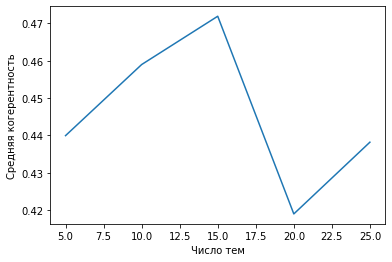

In [30]:
topics_list = [5, 10, 15, 20, 25]
coherences = []

for num in tqdm(topics_list):
    lda = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=num, chunksize=50, update_every=1, passes=2)
    coherences.append(CoherenceModel(model=lda, texts=data['text'], dictionary=dictionary, coherence='c_v').get_coherence())

plt.plot(topics_list, coherences)
plt.xlabel("Число тем")
plt.ylabel("Средняя когерентность")
plt.show()

In [33]:
lda_15 = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=15, chunksize=50, update_every=1, passes=2)
vis_data = gensimvis.prepare(lda_15, corpus, dictionary)
pyLDAvis.display(vis_data)

C:\Users\Mn_Specter\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
